#분류
- 지도학습 : label이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식


 # 앙상블

딥러닝 : 이미지, 영상, 음성, NLP 영역에서 신경망에 기반한 딥러닝  
앙상블 : 위를 제외한 정형 데이터의 예측 분석 영역(주로 분류)  




### 1. 앙상블이란? 
- 매우 많은 여러개의 약한 학습기(예측 능력이 상대적으로 떨어지는 알고리즘)를 결합해 확률적 보완과  
오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능 향상
- 대부분 동일한 알고리즘 결함
- 기본 알고리즘으로 보통 결정 트리(Decision Tree) 사용

#### +) 결정 트리(Decision tree)  
- if/else 기반의 규칙을 학습을 통해 자동으로 찾아내 tree 기반의 분류 규칙을 만드는 것.  
- 핵심 : 최대한 균일한 데이터 세트를 구성할 수 있도록 트리를 분할(split)하는 것 중요
- 정보의 균일도 측정   
1) 엔트로피를 이용한 정보 이득지수(Information Gain)  
 - 엔트로피 : 주어진 데이터 집합의 혼잡도( 서로 다른 값이 섞여 있으면 엔트로피 높고, 같은 값이 섞여있으면 엔트로피 낮음)  
  - 정보 이득 지수 = 1- 엔트로피  
  
  2) 지니 계수 : 불평등 지수 - 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석  
* 결정 트리(DecisionTreeClassifier) : 지니계수 이용해 데이터 세트 분할


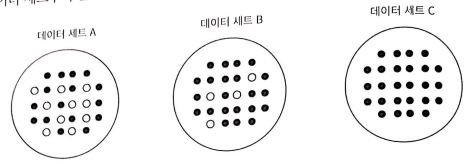

In [5]:
Image('tree.PNG')   # 데이터 세트 A는 불균일 데이터. 세트 C는 균일 데이터

#### +) 결정 트리의 장단점
- 장점 :   
1) 정보의 '균일도'라는 룰을 기반으로 하고 있어서 쉽고 직관적임.  
2) 시각화로 표현 가능  
3) 각 feature(열)들의 스케일링과 정규화 같은 전처리 작업이 필요 없음
- 단점 :   
1) 많은 규칙 -> 복잡도 증가 -> 과적합 -> 정확도 떨어짐

### 2. 앙상블 종류

1) Bagging    
* 대표 방식 : Randon Forest - 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성  

2) Boosting  
* 근래의 앙상블은 boosting 방식으로 발전하고 있음.
* Gradient Boosting : 뛰어난 예측 성능 / 수행 시간 길다.
* XgBoost(eXtra Gradient Boost) : 뛰어난 예측 성능 + 수행 시간 단축
* LightGBM : 뛰어난 예측 성능 + 수행 시간 단축  

3) Voting

기타) Staking
* 앙상블의 앙상블 

### 2-1. 앙상블 종류별 차이 비교  
* Voting : 일반적으로 서로 다른 알고리즘을 가진 분류기 결합하고 동일한 샘플링 데이터 사용.
* Bagging : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져감.  
 - bagging ex) Random Forest
  * Bootstrapping : 개별 분류기에게 데이터를 샘플링해서 추출하는 방식
 * (Cross Validation : 데이터 세트간의 중복을 허용하지 않음)  VS  (Bagging : 중복 허용)

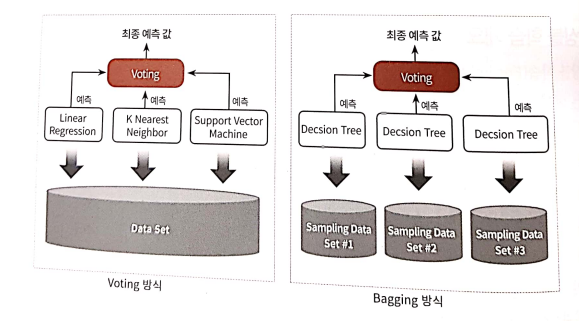

In [8]:
from IPython.display import Image
Image('vote_bag.PNG') 

* Boosting : 여러개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 진행  
 - ex) Gradient boosting,   XGBoost,   LightGBM
  

 * Stacking : 여러가지 다른 모델의 예측 결과값을 다리 학습 데이터로 만들어서 다른모델(메타 모델)로 재학습 시켜 결과를 예측하는 방법  

 * 정리 : Voting, Stacking - 서로 다른 알괴즘 기반 / Bagging, Boosting - 대부분 결정 트리 기반
 * Bias - variance trade off : 편향이 작아지면 분산이 커지고, 분산이 작아지면 편향이 커짐.  
 따라서 Bias - variance trade off의 효과를 극대화 할 수 있는 앙상블 기법을 결정 트리보다 많이 사용함.

## 3. Gradient Boosting 
* Boosting의 대표적인 예시 : AdaBoost, Gradient Boost 

3-1) AdaBoost  
- step1 : 첫번째 약한 학습기가 분류기준 1로 +와 -를 분류함. 동그라미로 표시된 + 는 잘못 분류된 오류 데이터
- step2 : 이 오류 데이터에 가중치(weight) 부여. 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐
- step3 : 두번째 약한 학습기가 분류 기준 2로 +와 -를 분류함. 동그라미로 표시된 - 는 잘못 분류된 오류 데이터 
- step4 : 이 오류 데이터에 가중치(weight) 부여. 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐
- step5 : 세번째 약한 학습기가 분류 기준 3으로 +와 -를 분류함. 
- Adaboost는 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측 수행

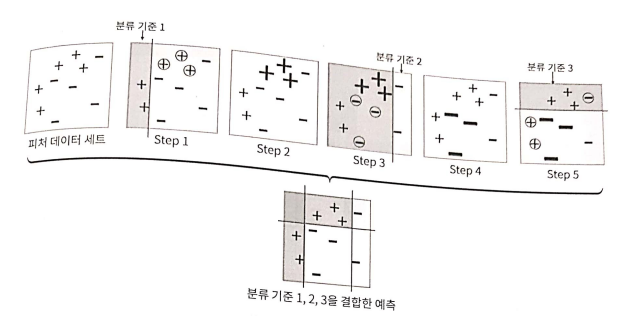

In [9]:
Image('adaboost.PNG')

3-2) Gradient Boost  
- Adaboost와 차이점 : 가중치(weight) 업데이트를 경사 하강법(Gradient Descent)을 이용한다.  
- 경사 하강법 : 오류값( h(x) = y - F(x) where y:실제값, F(x): 예측값)을 최소화하는 방향성을 가지고 반복적으로 가중치값을 업데이트 하는 것
- 장점 : Random Forest보다는 예측 성능이 조금 더 뛰어남
- 단점 : 
 - 수행 시간이 오래걸림. 
  - 하이퍼 파라미터 튜닉 복잡
  - 병렬처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요함.   
  (Random Forest는 상대적으로 빠른 수행시간 보장)
  - 과적합 규제(Regularization) 부재

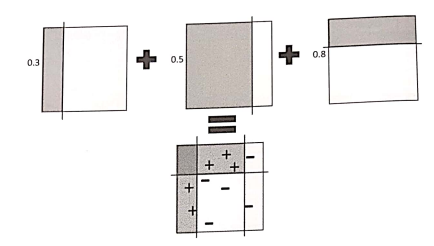

In [10]:
Image('gradient.PNG')

## 4. XGBoost
현재 분류 모델에서는 top model이고, 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나임.
- 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 가짐
- GBM(Gradient Boost Model)에 기반한 알고리즘
- GBM의 단점인 느린 수행시간 및 과적합 규제 부재 문제 해결 (But, Random Forest보다 빠른 것은 아님.)
- 병렬 CPU 환경에서 병렬 학습 가능 (= 병렬처리 가능)
- Tree pruning(가지치기) : 더이상 긍정 이득이 없는 분할을 가지치기 해서 분할수를 더 줄일 수 있음
- 자체 내장된 교차 검증 : train, test 데이터 세트에 대한 교차검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있고 중간에 머물 수 있는 "조기 중단" 기능 있음.
- 결측값 자체 처리    

XGBoost의 핵심 라이브러리는 C/C++로 작성됨.  
XGBoost 전용 패키지와 Scikit-learn과 호환되는 래퍼용 XGBoost가 함께 존재함.  

- Scikit-learn에서 제공하는 래퍼 클래스 : XGBClassifier, XGBRegressor
 - 장점 : Scikit-learn estimator가 학습을 위해 사용하는 fit()과 predict()와 같은 표준 Scikit-learn 개발 프로세스 및 다양한 유틸리티 활용가능.

In [6]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
cancer = load_breast_cancer()

In [ ]:
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**위스콘신 유방암 데이터**  

: 종양의 크기, 모양등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트   

* 악성 종양 : 주위 조직에 침입하면서 빠르게 성장하고 신체 각 부귀에 확산되거나 전이되어 생명을 위협함.  

* 양성 종양 : 비교적 성장 속도가 느리고 전이되지 않는 것.

# 1. 파이썬 래퍼 XGBoost 모듈 : xgboost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = load_breast_cancer()
X_features = dataset.data #속성 데이터
y_label = dataset.target #label 데이터 (악성 malignant:0, 양성 benign:1)

In [ ]:
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
#전체 데이터 중 80%는 ㅏㄱ습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [ ]:
# numpy 형태의 학습, 테스트 테디어를 DMatrix로 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# xgboost의 hyper parameter (딕셔너리 형태로 구성)
params = {'max_depth':3, # 최대 트리 갯수
          'eta':0.1, #learning rate
          'objective':'binary:logistic',  # 최소화하는 손실함수
          'eval_metric':'logloss', # 검증에 사용되는 함수 (logloss = Negative log-likelihood)
          'early_stoppings':100  # 조기 중단
          }
num_rounds = 400 # n_estimators


In [ ]:
#early_stopping_rounds(조기중단)을 수행하지 귀해서는 반드시 eval_set과 eval_metric이 함께 설정되어야함.
### eval_set : 성능평가를 수행할 평가용 dataset
### eval_metric : 평가용 dataset에 적용할 성는 평가 방법. 분류일 경우 주로 'error', 'logloss'를 적용.

In [ ]:
# train 데이터 세트는 'train', 평가용 데이터 세트는 'eval'로 명기함.
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
# train()함수로 학습 수행
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, early_stopping_rounds=100, evals=wlist)
#train-error와 eval-logloss가 지속적으로 감소함.

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

In [ ]:
# xgboost의 predict()는 sklearn의 predict()와는 달리 예측결과를 추정할 수 있는 확률값을 반환함. -> 확률>0.5이면 1, <=0.5이면 0으로 분류함.
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨.')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨.
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
# 3장 평가에서 생성한 get_clf_eval()함수를 적용해 XGBoost 모델의 예측 성능 평가

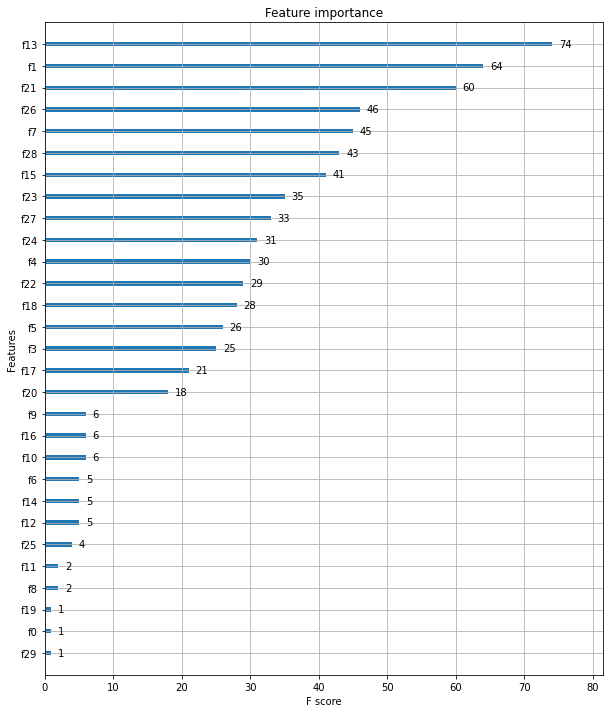

In [ ]:
# feature 중요도 시각화

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [ ]:
# 교차 검증
xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None,metrics=(),
           obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True,
           verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.610037,0.000064,0.617447,0.004961
1,0.541817,0.000202,0.555140,0.008989
2,0.483717,0.000955,0.503529,0.012238
3,0.434676,0.001311,0.459869,0.015795
4,0.392310,0.001686,0.423058,0.016788
5,0.355129,0.001390,0.391187,0.019785
6,0.322530,0.001908,0.361119,0.019378
7,0.294159,0.001618,0.337140,0.021086
8,0.269083,0.002068,0.314903,0.019972
9,0.246208,0.001940,0.295012,0.019237


# 2. 사이킷런 래퍼 XGBoost  
  
xgboost 래퍼와의 하이퍼 파라미터 차이  
* eta -> learning_rate
* sub_sample -> subsample
* lambda -> reg_lambda
* alpha -> reg_alpha

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBoost 
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
# 3장 평가에서 생성한 get_clf_eval()함수를 적용해 XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, w_preds, w_pred_proba)

In [ ]:
### 조기중단
# 평가 지표가 향상될 수 있는 반복 횟수 : early_stopping_rounds
# 조기 중단을 위한 평가 지표 : eval_metric
# 성능 평가를 수행할 데이터 세트(!= 학습 데이터) : eval_set
                    #-> 보통은 test data로 성능 평가를 하지 않지만 해당 데이터는 작은 데이터이기 때문에 불가피하게 테스트 데이터 사용함.
# early_stopping_rounds = 100, eval_metric = logloss, eval_set = test data
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
# 해석 : n_estimators = 400으로 설정해도 311번 반복한 후 학습 완료함. 
# -> 이유 : 211번 반복시의 logloss와 311 반복시의 logloss가 early_stopping_rounds=100으로 지정된 100번의 반복동안 
#           성능 평가 지수가 향상되지 않았기 때문에 더이상 반복하지 않고 멈춤.

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [ ]:
# 3장 평가에서 생성한 get_clf_eval()함수를 적용해 XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

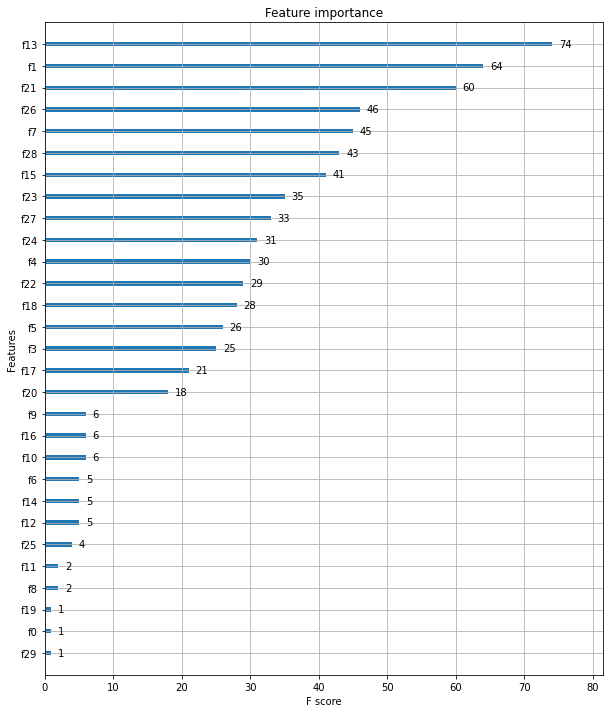

In [ ]:
# feature 중요도 시각화

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)

# 3. LightGBM

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier import
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer # 위스콘신 유방암 데이터
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

In [ ]:
# wjscp epdlxj wnd 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

#조기중단
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [ ]:
# 3장 평가에서 생성한 get_clf_eval()함수를 적용해 XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, preds, pred_proba)

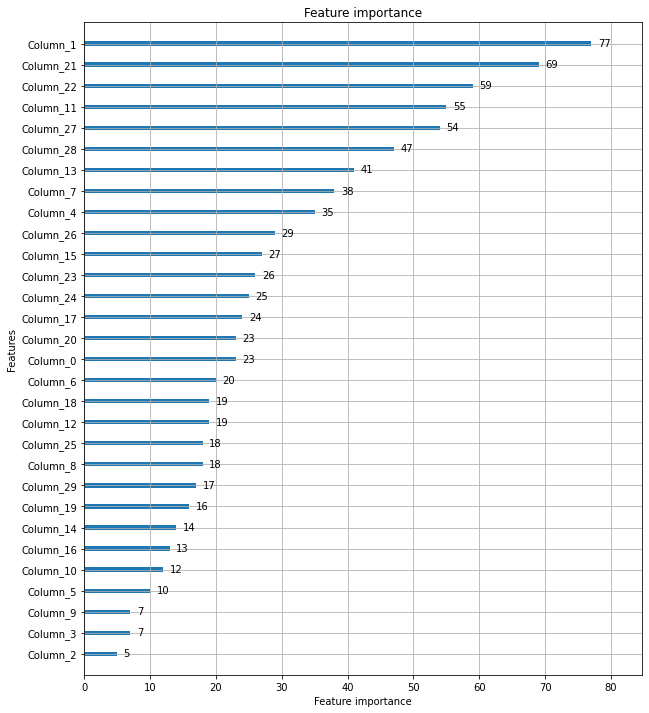

In [ ]:
# feature 중요도 시각화

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(lgbm_wrapper, ax=ax)

# 분류 실습  
**kaggle : 산탄데르 고객 만족(santander customer satisfaction)**  
* 370개 변수의 train data를 이용해서 고객 만족 여부 예측
* label : TARGET (1: 불만, 0: 만족)
* 모델 성능 평가 : ROC-AUC (이유 : 대부분의 만족이고 불만족은 일부이기 때문에 정확도 수치보다 더 적정한 수치임.)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/santander-customer-satisfaction')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
cust_dt = pd.read_csv('train.csv', encoding="latin-1")
print('dataset shape:', cust_dt.shape)  #변수 371개
cust_dt.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
cust_dt.info()  
#float64 : 298개, int64 : 73개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
# 전체 데이터에서 만족과 불만족의 비율
print(cust_dt['TARGET'].value_counts())
unsatisfied_cnt = cust_dt[cust_dt['TARGET'] == 1].TARGET.count()
total_cnt = cust_dt.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [ ]:
cust_dt.describe()
#var3의 min = -999999, NaN값이나 특정 예외값을 -999999로 변환했을 것임.

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [ ]:
print(cust_dt.var3.value_counts()[:10])
# -999999를 최빈값 2로 변환

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [ ]:
cust_dt['var3'].replace(-999999, 2, inplace=True)
cust_dt.drop('ID', axis=1, inplace=True) # iD열 삭제

# 변수 세트와 label 세트 분리. label columns은 cust_dt의 맨 마지막에 위치해 columns 위치 -1로 분리.
X_features = cust_dt.iloc[:,:-1]
y_labels = cust_dt.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [ ]:
# 비대칭 dataset에서 train, test set split 비율 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)
# train, test 모두 TARGET의 분포가 원본 데이터와 유사하게 전체 데이터의 4%정도의 불만족값(1)으로 만들어짐.

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


2) xgboost  적합

In [ ]:
# XGBoost 모델 학습 및 ROC AUR로 성능 평가
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, randam_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average="macro")
print("ROC AUC: {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

In [ ]:
# XGBoost의 하이퍼 파라미터 튜닝 -> column의 개수가 많으므로 과적합 가능성을 가정
# 1. max_depth, min_child_weight, colsample_bytree 만 일차 튜닝 대상.
# 학습 시간이 많이 필요한 ML 모델인 경우 하이퍼 파라미터 튜닝을 수행하는 요령 중 첫번째는 먼저 2~3개 정도의 파라미터를 결합해 최적 파라미터를 찾아낸 뒤에
# 이 최적 파라미털ㄹ 기반으로 다시 1~2개 파라미터를 결합해 파라미터 튜닝을 수행함.

In [ ]:
# n_estimators : 100, early_stopping_rounds : 30
# GridSearchCV 적용
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC: {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

3) LightGBM 적합

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
             eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

In [ ]:
# output : ROC AUC: 0.8396

In [ ]:
# gridsearch
from sklearn.model_selection import GridSearchCV

#하이터 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32,64],
          'max_depth': [128,160],
          'min_child_samples': [60,100],
          'subsample':[0.8,1]}

# cv = 3
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average="macro")
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

In [ ]:
# GridSearchCV 최적 파라미터 : {'max_depth':128, 'min_child_samples':100, 'num_leaves':32, 'subsample':0.8}
# ROC AUC: 0.8442

# 위의 최적 파라미터를 적용하고 다시 학습해 ROC-AUC 측정

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
           eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average="macro")
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

In [ ]:
# ROC AUC: 0.8442

# 분류 실습  
**kaggle : 신용카드 사기 검출(credit card fraud detection)**  
* label의 Class가 매우 불균형한 분포
* label : Class (1: 사기, 0: 정상) -> 0.172% 만이 사기임.
* label이 매우 불균형한 분포인 예 : 사기 검출(fraud detection), 이상 검출(anomaly detection)

**불균형 데이터 분석**  
이상 label을 가지는 데이터 건수가 정상 label에 비해 매우 적으면 정상 label로 치우친 학습을 수행해 제대로된 이상 데이터 검출이 어려움.  
해결 방안 :  
* 오버 샘플링 (예측 성능상 더 유리해 많이 사용함.)
* 언더 샘플링

* 오버 샘플링 : 적은 label을 가진 dataset을 많은 label을 가진 데이터 세트 수준으로 증식(동일한 데이터 증식-> 과적합이기 때문에 원본을 약간만 변경해 증식)  
ex) SMOTE(Synthetic Minority Over-sampling Technique)   
* 언더 샘플링 : 많은 label을 가진 dataset를 적은 label을 가진 데이터 세트 수준으로 감소(정상 label의 학습이 어려워지는 단점 때문에 잘 적용하지 않음.)

* SMOTE : 적은 dataset에 있는 개별 data들의 KNN을 찾아서 이 data와 K개의 이웃들의 차이를 일정값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 data들을 생성하는 방식  
